1.Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv')

In [3]:
print(df.shape)

(61, 5)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [5]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [6]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


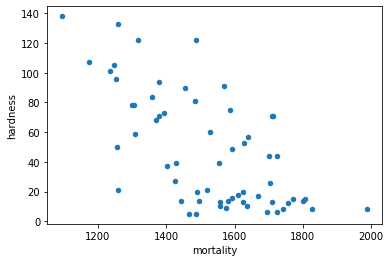

In [7]:
df.plot(kind='scatter', x='mortality', y='hardness')

In [8]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [9]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [10]:
df[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
X = df[['mortality']]
y = df['hardness']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
X_train.shape

(48, 1)

In [15]:
y_train.shape

(48,)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.coef_

array([-0.12403806])

In [18]:
model.intercept_

235.95413244496626

In [19]:
y_pred = model.predict(X_test)
y_pred

array([81.27867099, 42.70283417, 50.51723198, 24.84135346, 73.83638736,
       34.39228411, 79.79021426, 39.10573041, 47.54031853, 25.58558182,
       73.58831124, 51.75761259, 43.07494835])

In [20]:
model.score(X_test, y_test)   #Коэф. детерминации. Наша модель не очень хорошая, коэф.низковатый.

0.48163062057848005

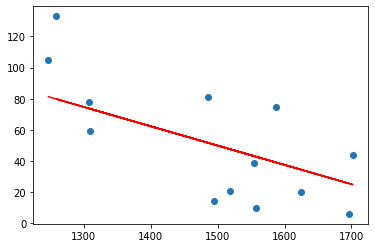

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

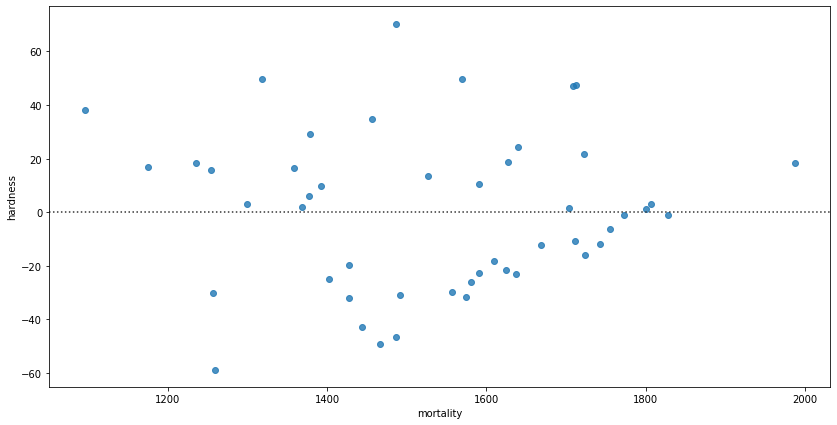

In [22]:
f, ax = plt.subplots(figsize=(14, 7))

sns.residplot(x=X_train,
             y=y_train); #График остатков. Упорядоченности не наблюдается. Модели можно доверять.

# Вывод
Между жёсткостью воды и средней годовой смертностью наблюдается прямая взаимосвязь.
Даных маловато, поэтому сократила тестовую группу до 20%. Это позволило повысить коэффициент детерминации с 0.42 до 0.48.
Жесткость воды является сопутствующим фактором смертности.


# 3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [3]:
df_south = df[df.location == 'South']
df_south

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


In [4]:
df_north = df[df.location == 'North']
df_north

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


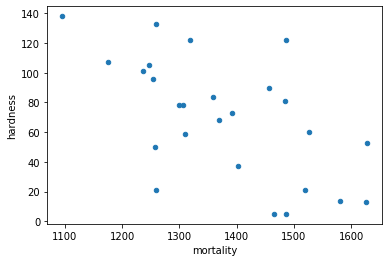

In [5]:
df_south.plot(kind='scatter', x='mortality', y='hardness')

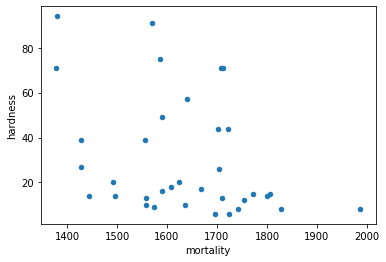

In [6]:
df_north.plot(kind='scatter', x='mortality', y='hardness')

In [7]:
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [8]:
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [9]:
df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [10]:
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [11]:
df_south[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [12]:
df_north[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


Очень низкий коэффициент у севера. Это указывает на то, что в воде на юге могут быть другие примеси, кроме жесткости, которые могут быть причиной корреляции.
Или на севере есть некие другие факторы, которые нейтрализуют жесткость, из-за чего она плохо коррелирует со смертностью.
В целом это ставит под сомнение гипотезу, что жесткость воды может являться причиной уровня смертности.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
X_s = df_south[['mortality']]
y_s = df_south['hardness']

In [25]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.25, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train_s, y_train_s)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model.coef_

array([-0.19144129])

In [28]:
model.intercept_

335.5684282411057

In [29]:
y_pred = model.predict(X_test_s)
y_pred

array([83.24880482, 51.0866677 , 96.84113659, 51.0866677 , 67.16773626,
       94.35239978, 84.97177646])

In [30]:
model.score(X_test_s, y_test_s) #На таких данных получается кривая модель.

-0.08799594721906723

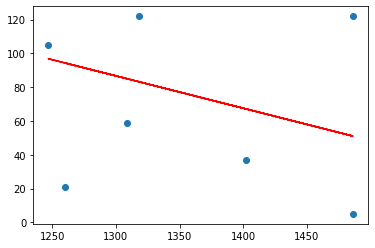

In [33]:
plt.scatter(X_test_s, y_test_s)
plt.plot(X_test_s, y_pred, c='r')

Точки очень сильно разбросаны, что указывает на очень слабую корреляцию.

In [34]:
X_n = df_north[['mortality']]
y_n = df_north['hardness']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.25, random_state=42)

In [36]:
model = LinearRegression()
model.fit(X_train_s, y_train_s)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
model.coef_

array([-0.19144129])

In [38]:
model.intercept_

335.5684282411057

In [40]:
y_pred = model.predict(X_test)
y_pred

array([-44.82541981,  34.23983396,  59.12720198,   5.5236401 ,
        30.98533199,   7.62949432,   9.73534853,   2.07769684,
        37.87721852])

In [41]:
model.score(X_test, y_test) 

-1.689171246418033

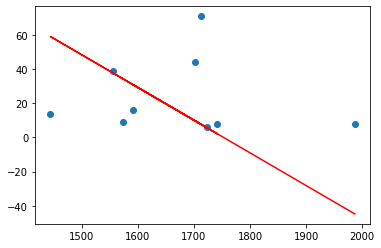

In [42]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Здесь правая крайняя точка похожа на выброс и ломает всю модель.
График говорит о другом типе зависимости (нелинейной).